In [44]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [45]:
full_df = pd.read_csv('heart_2020_cleaned.csv')
heart_df=full_df

In [46]:
X=heart_df.drop(columns='HeartDisease')
y=heart_df['HeartDisease'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [47]:
encode_GenHealth = OrdinalEncoder(categories=[['Poor','Fair','Good','Very good','Excellent']], handle_unknown='use_encoded_value', unknown_value=-1)

# Train the encoder
encode_GenHealth.fit(X_train['GenHealth'].values.reshape(-1, 1))

OrdinalEncoder(categories=[['Poor', 'Fair', 'Good', 'Very good', 'Excellent']],
               handle_unknown='use_encoded_value', unknown_value=-1)

In [48]:
X_train['GenHealth'] = encode_GenHealth.transform(X_train['GenHealth'].values.reshape(-1, 1))
X_train.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
84105,25.82,Yes,No,No,3.0,0.0,Yes,Female,35-39,White,No,Yes,2.0,6.0,Yes,No,No
140469,25.86,Yes,No,No,7.0,0.0,No,Female,65-69,White,No,Yes,4.0,8.0,No,No,Yes
63900,23.49,No,No,No,5.0,0.0,No,Male,18-24,Other,No,Yes,4.0,8.0,No,No,No
234425,19.37,Yes,Yes,No,0.0,0.0,No,Female,35-39,White,No,No,3.0,7.0,No,No,No
112315,20.92,Yes,No,No,0.0,0.0,No,Male,65-69,White,No,Yes,3.0,6.0,No,Yes,No


In [49]:
encode_binary = OrdinalEncoder(categories=[['No','Yes']], handle_unknown='use_encoded_value', unknown_value=-1)
encode_sex = OrdinalEncoder(categories=[['Female','Male']], handle_unknown='use_encoded_value', unknown_value=-1)

# Train the encoder
encode_binary.fit(X_train['Smoking'].values.reshape(-1, 1))
encode_binary.fit(X_train['AlcoholDrinking'].values.reshape(-1, 1))
encode_binary.fit(X_train['Stroke'].values.reshape(-1, 1))
encode_binary.fit(X_train['DiffWalking'].values.reshape(-1, 1))
encode_sex.fit(X_train['Sex'].values.reshape(-1, 1))
encode_binary.fit(X_train['PhysicalActivity'].values.reshape(-1, 1))
encode_binary.fit(X_train['Asthma'].values.reshape(-1, 1))
encode_binary.fit(X_train['KidneyDisease'].values.reshape(-1, 1))
encode_binary.fit(X_train['SkinCancer'].values.reshape(-1, 1))

OrdinalEncoder(categories=[['No', 'Yes']], handle_unknown='use_encoded_value',
               unknown_value=-1)

In [50]:
X_train['Smoking'] = encode_binary.transform(X_train['Smoking'].values.reshape(-1, 1))
X_train['AlcoholDrinking'] = encode_binary.transform(X_train['AlcoholDrinking'].values.reshape(-1, 1))
X_train['Stroke'] = encode_binary.transform(X_train['Stroke'].values.reshape(-1, 1))
X_train['DiffWalking'] = encode_binary.transform(X_train['DiffWalking'].values.reshape(-1, 1))
X_train['Sex'] = encode_sex.transform(X_train['Sex'].values.reshape(-1, 1))
X_train['PhysicalActivity'] = encode_binary.transform(X_train['PhysicalActivity'].values.reshape(-1, 1))
X_train['Asthma'] = encode_binary.transform(X_train['Asthma'].values.reshape(-1, 1))
X_train['KidneyDisease'] = encode_binary.transform(X_train['KidneyDisease'].values.reshape(-1, 1))
X_train['SkinCancer'] = encode_binary.transform(X_train['SkinCancer'].values.reshape(-1, 1))
X_train.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
84105,25.82,1.0,0.0,0.0,3.0,0.0,1.0,0.0,35-39,White,No,1.0,2.0,6.0,1.0,0.0,0.0
140469,25.86,1.0,0.0,0.0,7.0,0.0,0.0,0.0,65-69,White,No,1.0,4.0,8.0,0.0,0.0,1.0
63900,23.49,0.0,0.0,0.0,5.0,0.0,0.0,1.0,18-24,Other,No,1.0,4.0,8.0,0.0,0.0,0.0
234425,19.37,1.0,1.0,0.0,0.0,0.0,0.0,0.0,35-39,White,No,0.0,3.0,7.0,0.0,0.0,0.0
112315,20.92,1.0,0.0,0.0,0.0,0.0,0.0,1.0,65-69,White,No,1.0,3.0,6.0,0.0,1.0,0.0


In [51]:
encode_age = OrdinalEncoder(categories=[['18-24',
'25-29',
'30-34',
'35-39',
'40-44',
'45-49',
'50-54',
'55-59',
'60-64',
'65-69',
'70-74',
'75-79',
'80 or older']], handle_unknown='use_encoded_value', unknown_value=-1)

# Train the encoder
encode_age.fit(X_train['AgeCategory'].values.reshape(-1, 1))

OrdinalEncoder(categories=[['18-24', '25-29', '30-34', '35-39', '40-44',
                            '45-49', '50-54', '55-59', '60-64', '65-69',
                            '70-74', '75-79', '80 or older']],
               handle_unknown='use_encoded_value', unknown_value=-1)

In [52]:
X_train['AgeCategory'] = encode_age.transform(X_train['AgeCategory'].values.reshape(-1, 1))
X_train['AgeCategory']=X_train['AgeCategory']*5+22
X_train.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
84105,25.82,1.0,0.0,0.0,3.0,0.0,1.0,0.0,37.0,White,No,1.0,2.0,6.0,1.0,0.0,0.0
140469,25.86,1.0,0.0,0.0,7.0,0.0,0.0,0.0,67.0,White,No,1.0,4.0,8.0,0.0,0.0,1.0
63900,23.49,0.0,0.0,0.0,5.0,0.0,0.0,1.0,22.0,Other,No,1.0,4.0,8.0,0.0,0.0,0.0
234425,19.37,1.0,1.0,0.0,0.0,0.0,0.0,0.0,37.0,White,No,0.0,3.0,7.0,0.0,0.0,0.0
112315,20.92,1.0,0.0,0.0,0.0,0.0,0.0,1.0,67.0,White,No,1.0,3.0,6.0,0.0,1.0,0.0


In [53]:
encode_categorical = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
encode_categorical.fit(X_train['Race'].values.reshape(-1, 1))
encode_categorical.fit(X_train['Diabetic'].values.reshape(-1, 1))

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [54]:
X_data_numeric = X_train.select_dtypes(include='number').reset_index()
race_encoded_df = pd.DataFrame(encode_categorical.transform(X_train['Race'].values.reshape(-1, 1)), columns=encode_categorical.get_feature_names_out())
diabetic_encoded_df = pd.DataFrame(encode_categorical.transform(X_train['Diabetic'].values.reshape(-1, 1)), columns=encode_categorical.get_feature_names_out())
dfs = [X_data_numeric, race_encoded_df, diabetic_encoded_df]
X_train = pd.concat(dfs, axis=1)
X_train.head()

c:\Users\rferr\anaconda3\envs\dev\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,index,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,"x0_No, borderline diabetes",x0_Yes,x0_Yes (during pregnancy),"x0_No, borderline diabetes",x0_Yes,x0_Yes (during pregnancy)
0,84105,25.82,1.0,0.0,0.0,3.0,0.0,1.0,0.0,37.0,...,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,140469,25.86,1.0,0.0,0.0,7.0,0.0,0.0,0.0,67.0,...,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,63900,23.49,0.0,0.0,0.0,5.0,0.0,0.0,1.0,22.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,234425,19.37,1.0,1.0,0.0,0.0,0.0,0.0,0.0,37.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,112315,20.92,1.0,0.0,0.0,0.0,0.0,0.0,1.0,67.0,...,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
numeric_features=['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
categorical_features=['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth','Asthma', 'KidneyDisease', 'SkinCancer']

In [56]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(full_df[categorical_features])
full_df[categorical_features] = enc.transform(full_df[categorical_features])

In [57]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
scaler.fit(full_df)
scaled_data = scaler.transform(full_df)
scaled_df = pd.DataFrame(scaled_data, columns=heart_df.columns)

In [58]:
correlation = scaled_df.corr()
print(correlation['HeartDisease'].sort_values(ascending = False),'\n')

HeartDisease        1.000000
AgeCategory         0.233432
DiffWalking         0.201258
Stroke              0.196835
PhysicalHealth      0.170721
Diabetic            0.168553
KidneyDisease       0.145197
Smoking             0.107764
SkinCancer          0.093317
Sex                 0.070040
BMI                 0.051803
Asthma              0.041444
Race                0.034854
MentalHealth        0.028591
SleepTime           0.008327
GenHealth          -0.011062
AlcoholDrinking    -0.032080
PhysicalActivity   -0.100030
Name: HeartDisease, dtype: float64 



Index(['HeartDisease', 'AgeCategory', 'DiffWalking', 'Stroke',
       'PhysicalHealth', 'Diabetic', 'KidneyDisease', 'Smoking', 'SkinCancer',
       'Sex', 'BMI', 'Asthma', 'Race', 'MentalHealth', 'SleepTime',
       'GenHealth', 'AlcoholDrinking', 'PhysicalActivity'],
      dtype='object')


<Axes: >

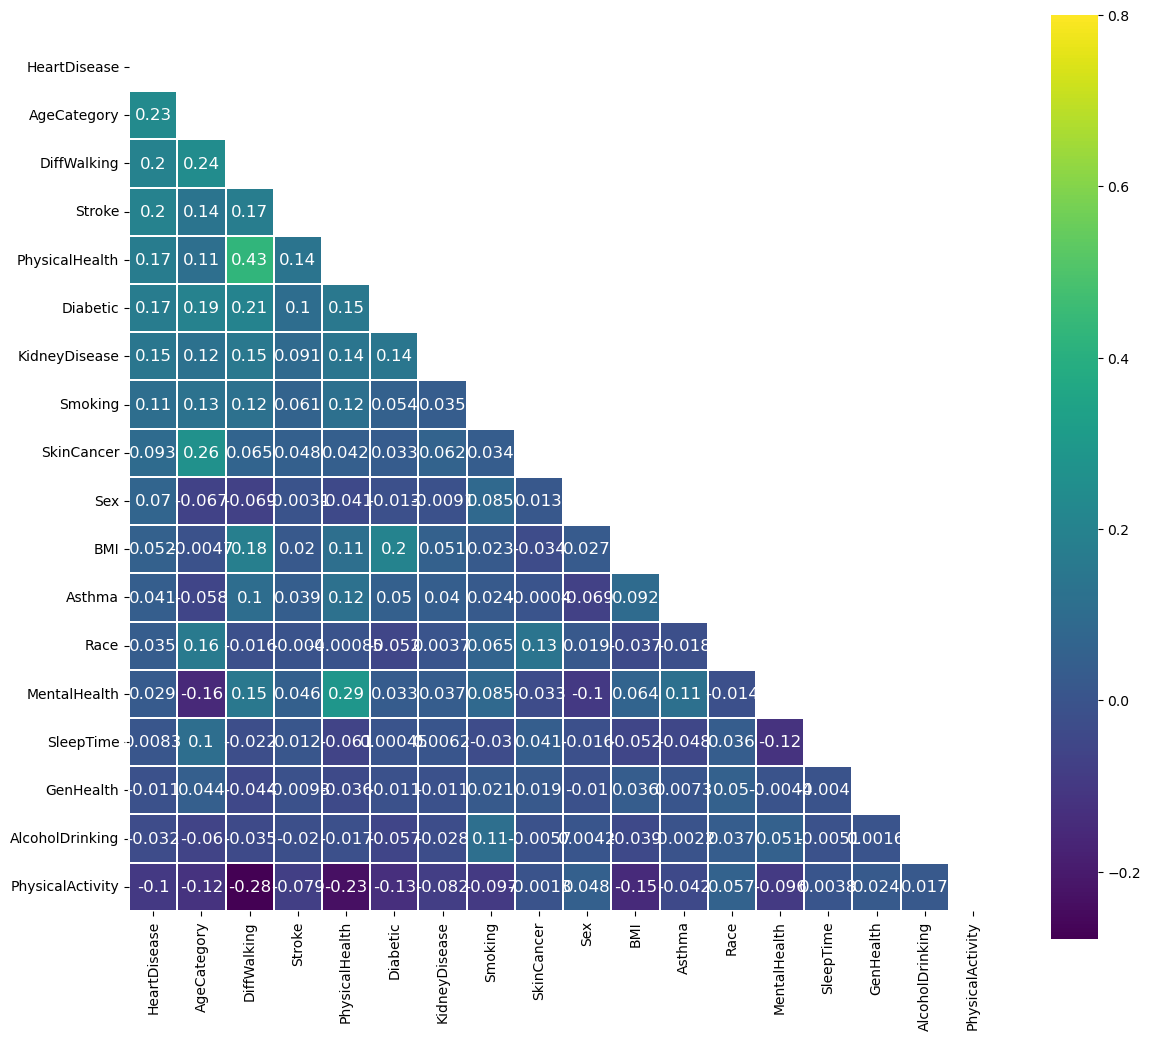

In [59]:
k= 18
cols = correlation.nlargest(k,'HeartDisease')['HeartDisease'].index
print(cols)
cm = np.corrcoef(scaled_df[cols].values.T)
mask = np.triu(np.ones_like(heart_df.corr()))
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm,mask=mask, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

In [60]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score

In [61]:
y=full_df['HeartDisease']
full_df.drop('HeartDisease',axis=1,inplace=True)

In [62]:
X_train, X_test, y_train, y_test=train_test_split(full_df,y,test_size=0.1,random_state=0)

In [63]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31980 entries, 126167 to 93850
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BMI               31980 non-null  float64
 1   Smoking           31980 non-null  float64
 2   AlcoholDrinking   31980 non-null  float64
 3   Stroke            31980 non-null  float64
 4   PhysicalHealth    31980 non-null  float64
 5   MentalHealth      31980 non-null  float64
 6   DiffWalking       31980 non-null  float64
 7   Sex               31980 non-null  float64
 8   AgeCategory       31980 non-null  float64
 9   Race              31980 non-null  float64
 10  Diabetic          31980 non-null  float64
 11  PhysicalActivity  31980 non-null  float64
 12  GenHealth         31980 non-null  float64
 13  SleepTime         31980 non-null  float64
 14  Asthma            31980 non-null  float64
 15  KidneyDisease     31980 non-null  float64
 16  SkinCancer        31980 non-null  float6

In [64]:
models = [KNeighborsClassifier(), LogisticRegression(), XGBClassifier(),ExtraTreesClassifier()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(f'Accuracy_score: {accuracy_score(y_test,y_pred)}')
    print(f'Precission_score: {precision_score(y_test,y_pred)}')
    print(f'Recall_score: {recall_score(y_test,y_pred)}')
    print(f'F1-score: {f1_score(y_test,y_pred)}')
    print('-'*30, '\n')

model: KNeighborsClassifier()
Accuracy_score: 0.9071607254534084
Precission_score: 0.3446808510638298
Recall_score: 0.08836363636363637
F1-score: 0.1406657018813314
------------------------------ 



c:\Users\rferr\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


model: LogisticRegression()
Accuracy_score: 0.9144777986241401
Precission_score: 0.5123152709359606
Recall_score: 0.11345454545454546
F1-score: 0.18576957427805896
------------------------------ 

model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Accuracy_score: 0.9146341463414634
Pre

In [65]:
X_train, X_test, y_train, y_test=train_test_split(scaled_df,y,test_size=0.1,random_state=0)

In [66]:
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)

LogisticRegression()

In [67]:
# Generate predictions from the model we just fit
predictions = LRmodel.predict(X_test)

# Convert those predictions (and actual values) to a DataFrame
results_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test})

from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[28265,   965],
       [ 2328,   422]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

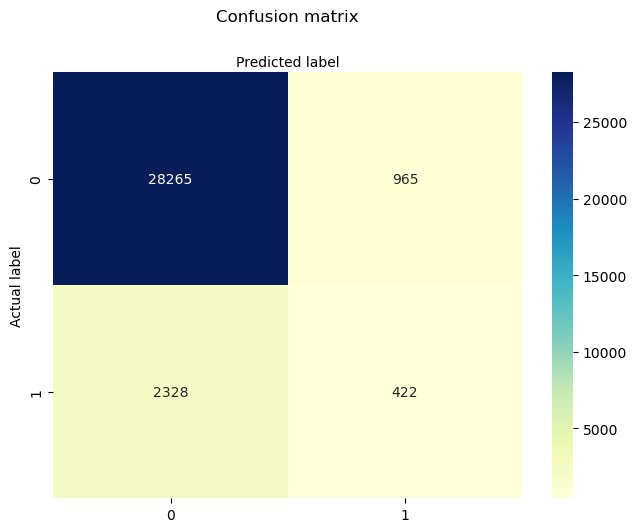

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [69]:
# Import RandomUnderSampler from imblearn
from imblearn.under_sampling import RandomUnderSampler

# Instantiate a RandomUnderSampler instance
rus = RandomUnderSampler(random_state=1)

In [70]:
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
X_tesampled, y_tesampled = rus.fit_resample(X_test, y_test)
#X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
#X_resampled, y_resampled = cc_sampler.fit_resample(X_train, y_train)
#X_resampled, y_resampled = smote_sampler.fit_resample(X_train, y_train)
#X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

In [71]:
LRmodel = LogisticRegression()
LRmodel.fit(X_resampled, y_resampled)

LogisticRegression()

In [72]:
predictions = LRmodel.predict(X_test)

# Convert those predictions (and actual values) to a DataFrame
results_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test})

from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(predictions,y_test)
cnf_matrix

array([[29230,     0],
       [    0,  2750]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

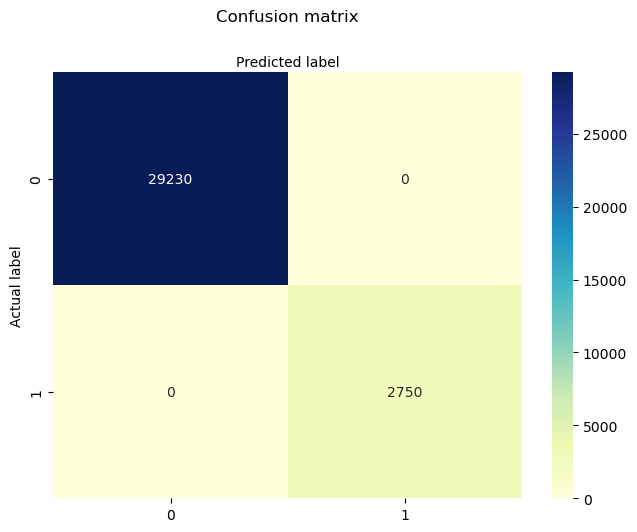

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [75]:
heart_pca = pca.fit_transform(scaled_df)
pca.explained_variance_ratio_

array([0.13495586, 0.08794964, 0.06830227])

In [76]:
# Create the PCA DataFrame
heart_pca_df = pd.DataFrame(
    heart_pca,
    columns=["PCA1", "PCA2","PCA3"]
)

In [77]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca=train_test_split(heart_pca_df,y,test_size=0.1,random_state=0)

In [78]:
LRmodel = LogisticRegression()
LRmodel.fit(X_train_pca, y_train_pca)

LogisticRegression()

In [79]:
predictions = LRmodel.predict(X_test_pca)

# Convert those predictions (and actual values) to a DataFrame
results_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test_pca})

from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(predictions,y_test_pca)
cnf_matrix

array([[28677,  1643],
       [  553,  1107]], dtype=int64)

In [80]:
accuracy_score(predictions,y_test_pca)

0.9313320825515947

Text(0.5, 427.9555555555555, 'Predicted label')

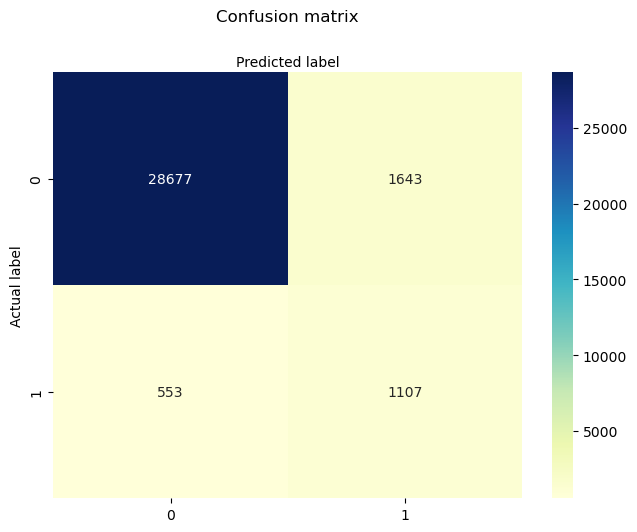

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')